I visited capetown in 2018. It was my first international travel so the city remains special to me. I would love to go back there one day. Inspired by this, i choose to do a brief weather analysis on it to know the best time to visit. I cannot wait to have a taste of the fine Stellenbosch wine!

The goal here is to have fun sooo remember this next line of code!!



In [1]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


# Getting Data 

I got the data from http://www.wunderground.com/history and downloaded it to my local PC as a CSV file. 


In [2]:
import pandas as pd
df = pd.read_csv ("C:\\Users\\hp\\Documents\\Downloads\\Data Analysis-Pandas\\Data Analysis-Pandas-2\\CapeTown_CPT_2014.csv")

In [3]:
#lets check the data to see if we got it right
df.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,28,23,18,19,17,15,88,71,45,...,19.0,14.0,10.0,35,14,NaN,0.0,2.0,NaN,213<br />
1,2014-1-2,28,23,18,19,18,16,88,74,46,...,26.0,13.0,10.0,32,21,NaN,0.0,2.0,NaN,204<br />
2,2014-1-3,27,23,19,19,18,18,94,75,48,...,31.0,12.0,3.0,32,26,NaN,0.0,4.0,NaN,193<br />
3,2014-1-4,27,22,18,19,18,14,88,74,46,...,26.0,13.0,9.0,32,18,NaN,0.0,3.0,NaN,314<br />
4,2014-1-5,26,22,18,17,16,14,83,70,46,...,26.0,13.0,10.0,45,21,NaN,0.0,4.0,Rain,25<br />


perfect! If you want to a certain number of rows, you can pass the number to the df.head() but otherwise it gives 5 as default

# Cleaning the data
The next step will be refining our data. In some cases as a data scientist, you will be required to analyse data that you were not involved in collecting and as a result, there may be many unnecessary details in the data. (well this may also happend when you collect data yourself!). It is therefore key to clean your data and have only what is important for you

1. First we need to clean up the data. Lets rename the superfulous column name 'WindDirDegrees< br />' to 'WindDirDegrees

In [4]:
df = df.rename(columns = {'WindDirDegrees<br />' : 'WindDirDegrees'})

2. Remove the HTML tag <br/>

In [5]:
df['WindDirDegrees'] =df['WindDirDegrees'].str.rstrip('<br />')

In [6]:
df.dtypes


Date                            object
Max TemperatureC                 int64
Mean TemperatureC                int64
Min TemperatureC                 int64
Dew PointC                       int64
MeanDew PointC                   int64
Min DewpointC                    int64
Max Humidity                     int64
 Mean Humidity                   int64
 Min Humidity                    int64
 Max Sea Level PressurehPa       int64
 Mean Sea Level PressurehPa      int64
 Min Sea Level PressurehPa       int64
 Max VisibilityKm              float64
 Mean VisibilityKm             float64
 Min VisibilitykM              float64
 Max Wind SpeedKm/h              int64
 Mean Wind SpeedKm/h             int64
 Max Gust SpeedKm/h            float64
Precipitationmm                float64
 CloudCover                    float64
 Events                         object
WindDirDegrees                  object
dtype: object

Change the value in the WindDirDegrees to float and the GMT to datetime

In [7]:
df['WindDirDegrees'] = df['WindDirDegrees'].astype('float64')   
df['Date'] = pd.to_datetime(df['Date'])



In [8]:
#change default index to the datetime64

df.index = df['Date']


Great. we are all set regarding our data types

# Finding a summer break

A quick wiki search says that summer in Capetown is from November to march. Thats perfect timing because my birthday is in November!! (Doing a happy dance here. 

In [10]:
from datetime import datetime


In [11]:
summer = df.loc[datetime(2014,1,1) : datetime(2014,3,16)]

In [12]:
#Lets fnd the super warm days so we know when to hit the beach in those bikini bodies! haha
summer[summer['Mean TemperatureC'] >= 25]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-21,2014-01-21,31,25,19,18,16,14,78,58,31,...,10.0,10.0,10.0,35,24,45.0,0.0,1.0,NaN,207.0
2014-01-30,2014-01-30,31,26,21,19,17,15,73,59,40,...,31.0,13.0,10.0,37,27,NaN,0.0,1.0,NaN,169.0
2014-01-31,2014-01-31,35,28,20,20,18,15,73,56,28,...,10.0,10.0,10.0,24,13,NaN,0.0,1.0,NaN,205.0
2014-02-14,2014-02-14,33,26,19,20,18,15,83,60,36,...,31.0,14.0,10.0,35,21,NaN,0.0,1.0,NaN,172.0
2014-02-15,2014-02-15,33,28,22,21,19,18,78,64,36,...,26.0,16.0,10.0,34,16,NaN,0.0,1.0,NaN,195.0
2014-02-16,2014-02-16,36,28,20,21,19,17,83,61,38,...,31.0,22.0,10.0,29,18,NaN,0.0,1.0,NaN,202.0
2014-02-17,2014-02-17,29,26,22,21,19,16,88,69,39,...,31.0,14.0,9.0,34,13,NaN,0.0,4.0,NaN,205.0
2014-02-18,2014-02-18,31,27,22,21,20,18,94,68,43,...,31.0,12.0,10.0,42,31,NaN,0.0,1.0,NaN,174.0
2014-02-25,2014-02-25,33,26,19,17,16,14,73,55,30,...,31.0,14.0,10.0,40,26,NaN,0.0,1.0,NaN,158.0


In [13]:
%matplotlib inline

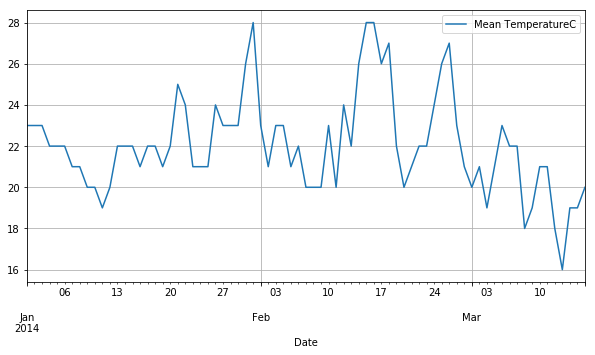

In [14]:
#Lets visualize this in a line graph
summer['Mean TemperatureC'].plot(grid=True, figsize=(10,5),legend= "top left")

looks like we have fairly warm days distributed throughout the whole perioid. Lets check for rainy days as well. From what i remember, morning showers were a common thing in capetown 

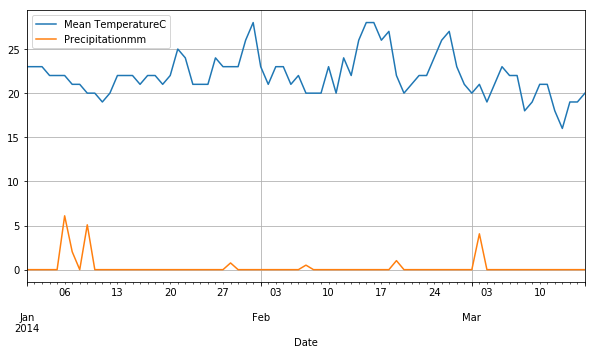

In [15]:
summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

GREAT! looks like we only have a few rainy days in the beginning of the year. We could spend those snuggled up in bed with a bestseller. Have you read "Going Home" by Yaa Gyasi? NO? Buy that book and thank me later!

Conclusion
The weather in CapeTown looks frindsly throughout summer. Some days in January are quite cold with rain so if you're totally avoiding winter weather, avoid January and probably plan your trip for February where its all sun and no rain. 
Finnaly, have fun in Madiba Land. 